# Fiducial Segmentation Reproducibility
Produces Supplemental figure S5.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../data/distortions_df.csv', low_memory=False)
df = df[df['Method']=='UNetAxis']
df.drop(df[(df['Subject'] == 'P0020') & (df['Session'] == '20240419161029')].index, inplace=True)

df['LabelValue'] = df['LabelValue'].astype(int)

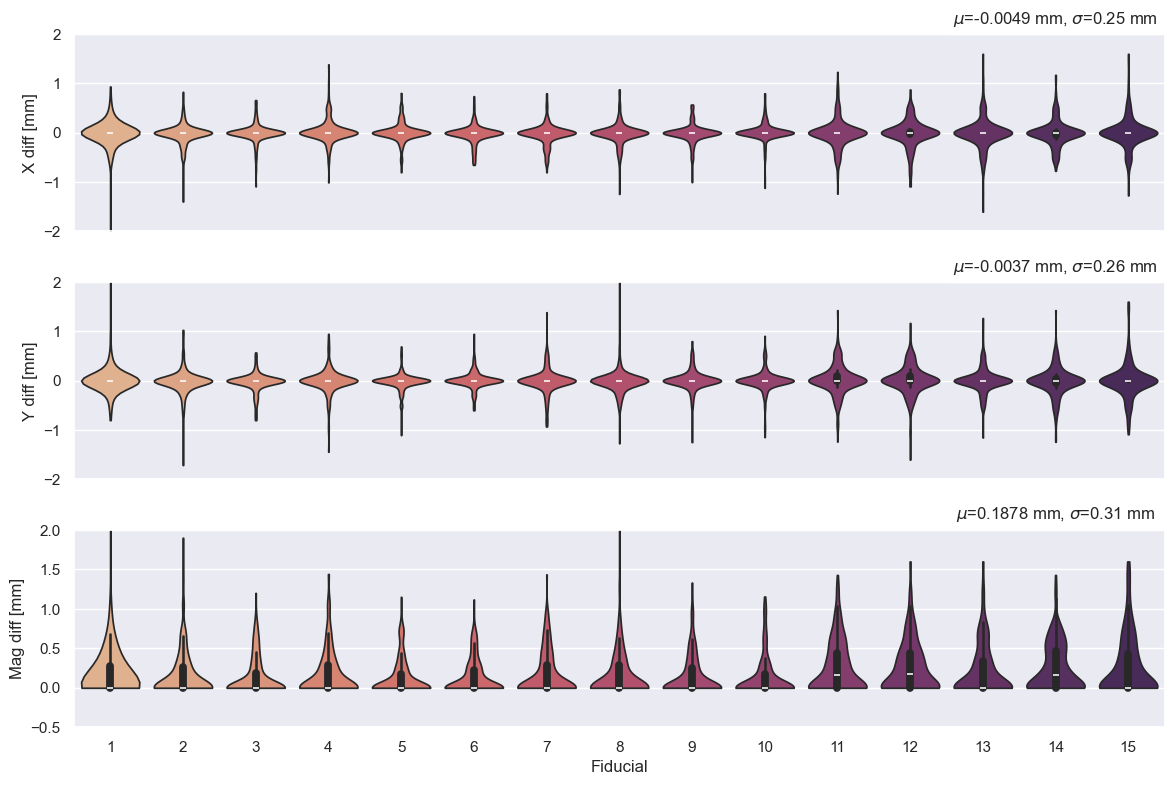

In [5]:
df_pivot = df[(df.Axis == 'axi')].pivot(index=['Subject','LabelValue', 'Session'], columns='Run')
diff_x = df_pivot[('x_org', 1)] - df_pivot[('x_org', 2)]
diff_y = df_pivot[('y_org', 1)] - df_pivot[('y_org', 2)]
diff_mag_2D = np.sqrt(diff_x**2 + diff_y**2)

diff_df = pd.DataFrame({'X':diff_x, 'Y':diff_y, 'Mag2D':diff_mag_2D})

sns.set_theme()
fig, axes = plt.subplots(3,1,figsize=(12,8))

text_y = [2.3,2.3,2.2]
for i,k in enumerate(['X', 'Y', 'Mag2D']):
    sns.violinplot(diff_df, x='LabelValue', y=k, hue='LabelValue', legend=None, ax=axes[i], cut=0, palette='flare', bw_method='silverman')
    # sns.boxplot(diff_df, x='LabelValue', y=k, hue='LabelValue', legend=None, ax=axes[i], palette='flare')
    axes[i].text(13,text_y[i],fr"$\mu$={diff_df[k].mean():.4f} mm, $\sigma$={diff_df[k].std():.2f} mm", 
                 horizontalalignment='center', verticalalignment='center', backgroundcolor='w')

for i in range(2):
    axes[i].set_xlabel(None)
    axes[i].set_xticks([])

for ax in axes:
    ax.set_ylim([-2,2])

axes[2].set_ylim([-.5,2])

axes[0].set_ylabel('X diff [mm]')
axes[1].set_ylabel('Y diff [mm]')
axes[2].set_ylabel('Mag diff [mm]')
axes[2].set_xlabel('Fiducial')

plt.tight_layout()
plt.savefig('../results/figureS5_nnUNet_reproducibility.png', dpi=300)
plt.show()